In [5]:
# world = df_3[df_3['Class Index'] == 4]['Description']
# plt.figure(figsize=(5, 5))
# wordcloud = WordCloud(min_font_size=3, max_words=2500, width=1200, height=800).generate(" ".join(world))
# plt.imshow(wordcloud, interpolation='bilinear')
# plt.axis('off')
# plt.show()


In [6]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


import nltk
import re
import string as s

from nltk.corpus import stopwords
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score, accuracy_score
from sklearn.naive_bayes import MultinomialNB


from nltk.corpus import stopwords
from wordcloud import WordCloud

In [7]:
df = pd.read_parquet('/content/drive/MyDrive/news.parquet')
df.head()

,title,category,description,source
0,Amazon Blames Inflation as It Increases Cost o...,Business,The increases are steeper than the 17 percent ...,https://huggingface.co/datasets/okite97/news-data
1,CBN Eyes $200bn from Fresh Non-Oil Exports,Business,The Governor of the Central Bank of Nigeria (C...,https://huggingface.co/datasets/okite97/news-data
2,Buhari Returns Ownership of Four Oil Blocks to...,Business,Nigeria's President Muhammadu Buhari has appro...,https://huggingface.co/datasets/okite97/news-data
3,Indigenous Participation in Nigeria’s Gas Sect...,Business,Chief Executive of the Nigerian Upstream Petro...,https://huggingface.co/datasets/okite97/news-data
4,Multichoice Pays N8bn Deposit In ‘Tax Evasion’...,Business,In complying with the directives of the tax ap...,https://huggingface.co/datasets/okite97/news-data


<ipython-input-9-e7b391ce606e>:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')


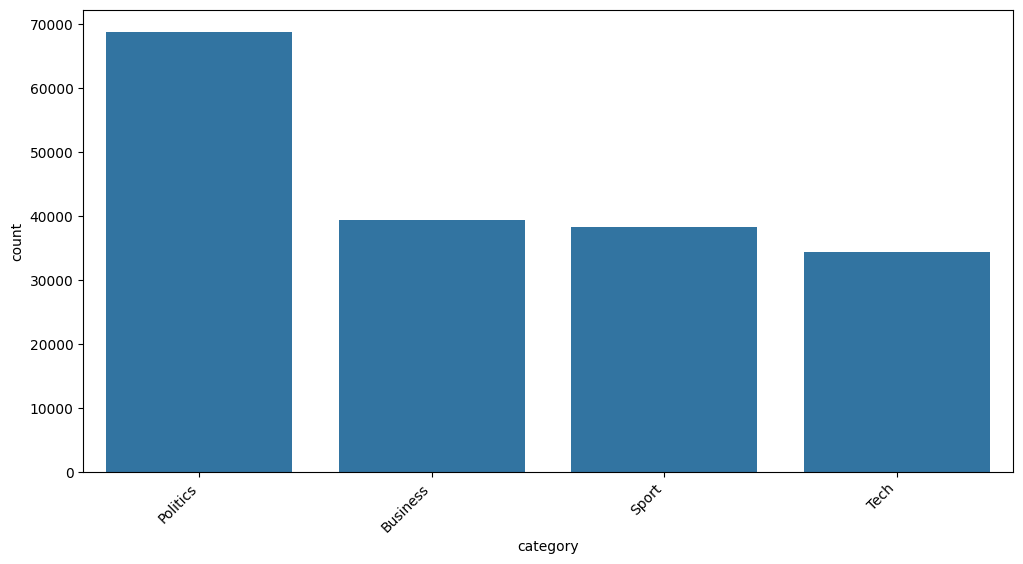

In [9]:
# Create a count plot
plt.figure(figsize=(12, 6))  # Set the figure size

# Count the categories and sort them in descending order
category_counts = df['category'].value_counts().sort_values(ascending=False)

# Create the count plot with the specified order
ax = sns.countplot(data=df, x='category', order=category_counts.index)

# Rotate x-axis labels by 45 degrees
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')

# Change x-axis label font size
ax.tick_params(axis='x', labelsize=10)  # Adjust the font size as needed

# Show the plot
plt.show()

In [10]:
df['category'].value_counts()

category
Politics    68765
Business    39384
Sport       38300
Tech        34344
Name: count, dtype: int64

In [11]:
df.isna().sum()

title          0
category       0
description    0
source         0
dtype: int64

### **Down Sampling**

In [12]:
majority_class = 'Politics'

# Calculate the number of samples in the majority class
majority_count = df[df['category'] == majority_class].shape[0]

In [13]:
# Set the desired number of samples for each class (e.g., equal to the number of samples in the minority class)
desired_count = df[df['category'] != majority_class]['category'].value_counts().min()
desired_count

34344

In [14]:
downsampled_df = pd.concat([
    df[df['category'] == majority_class].sample(desired_count),
    df[df['category'] != majority_class]
])

In [15]:
# Shuffle the DataFrame to randomize the order of samples
downsampled_df = downsampled_df.sample(frac=1).reset_index(drop=True)

In [16]:
downsampled_df.shape

(146372, 4)

In [17]:
downsampled_df.head()

,title,category,description,source
0,Lack of cash killed Beagle 2,Tech,If there had been as many people taking care o...,https://www.kaggle.com/datasets/amananandrai/a...
1,Some States Split With Bush on Emissions (AP),Tech,AP - Two sets of Americans have come here to t...,https://www.kaggle.com/datasets/amananandrai/a...
2,Mobile phone #39;deafness #39; risk,Tech,p2pnet.net News:- Defects in Siemens 65 series...,https://www.kaggle.com/datasets/amananandrai/a...
3,China #39;s Consumer Electronics Market Grows,Tech,China #39;s consumer electronics market will g...,https://www.kaggle.com/datasets/amananandrai/a...
4,WebMasterWorld Conference Coverage,Tech,WebMasterWorld Conference Coverage\\I just wan...,https://www.kaggle.com/datasets/amananandrai/a...


In [18]:
downsampled_df['category'].value_counts()

category
Business    39384
Sport       38300
Tech        34344
Politics    34344
Name: count, dtype: int64

In [19]:
df = downsampled_df

### up sample

In [20]:
# Function to count the number of words in a text
def count_words(text):
    return len(text.split())

# Apply the count_words function to the 'short desc' column and create a new 'text_length' column
df['text length'] = df['description'].apply(count_words)

# Apply the count_words function to the 'headline' column and create a new 'text_length' column
df['text length title'] = df['title'].apply(count_words)

# Display the updated DataFrame
df.head()

,title,category,description,source,text length,text length title
0,Lack of cash killed Beagle 2,Tech,If there had been as many people taking care o...,https://www.kaggle.com/datasets/amananandrai/a...,47,6
1,Some States Split With Bush on Emissions (AP),Tech,AP - Two sets of Americans have come here to t...,https://www.kaggle.com/datasets/amananandrai/a...,37,8
2,Mobile phone #39;deafness #39; risk,Tech,p2pnet.net News:- Defects in Siemens 65 series...,https://www.kaggle.com/datasets/amananandrai/a...,25,5
3,China #39;s Consumer Electronics Market Grows,Tech,China #39;s consumer electronics market will g...,https://www.kaggle.com/datasets/amananandrai/a...,37,6
4,WebMasterWorld Conference Coverage,Tech,WebMasterWorld Conference Coverage\\I just wan...,https://www.kaggle.com/datasets/amananandrai/a...,51,3


In [21]:
df.describe()

,text length,text length title
count,146372.000000,146372.000000
mean,27.726000,7.517346
std,12.037585,2.699512
min,0.000000,0.000000
25%,21.000000,6.000000
50%,28.000000,7.000000
75%,34.000000,9.000000
max,208.000000,27.000000


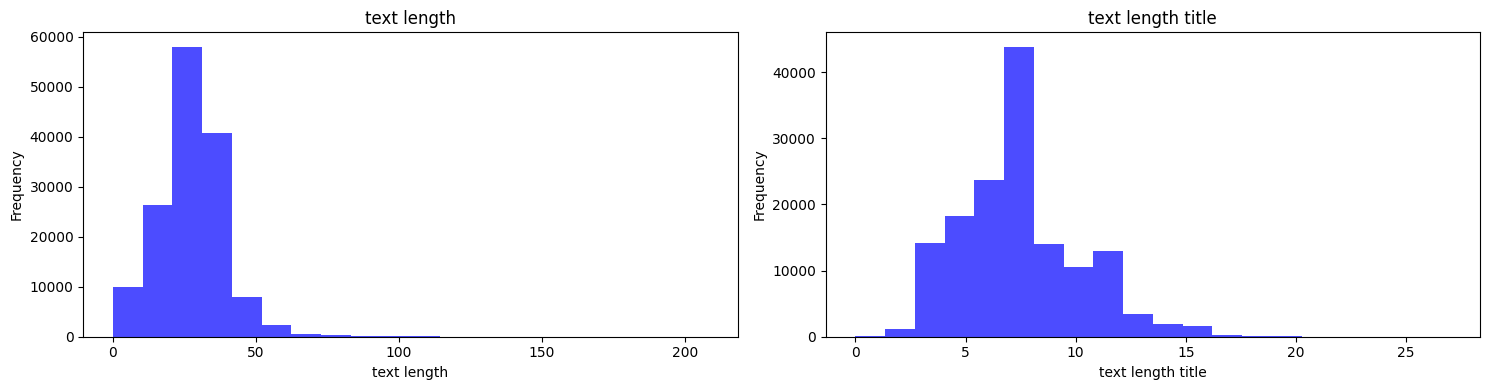

In [22]:
numerical_columns = df.select_dtypes(include='number')

# Set up subplots based on the number of numerical columns
num_plots = numerical_columns.shape[1]
fig, axes = plt.subplots(nrows=1, ncols=num_plots, figsize=(15, 4))

# Plot histograms for each numerical column
for i, col in enumerate(numerical_columns.columns):
    axes[i].hist(numerical_columns[col], bins=20, color='blue', alpha=0.7)
    axes[i].set_title(col)
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

In [23]:
# Group the DataFrame by "category" where "text_length" is zero and count the values
grouped = df[df['text length'] == 0].groupby('category').size()

# Display the value counts for each category
print(grouped)

category
Business     860
Politics    1537
Sport        663
Tech           1
dtype: int64


In [24]:
# Group the DataFrame by "category" where "text_length" is zero and count the values
grouped = df[df['text length title'] == 0].groupby('category').size()

# Display the value counts for each category
print(grouped)

category
Business    1
dtype: int64


In [25]:
# Concatenate headline and short_description columns'
df['full_description'] = df['title'].str.strip() + ' ' + df['description'].str.strip()
df.head()

,title,category,description,source,text length,text length title,full_description
0,Lack of cash killed Beagle 2,Tech,If there had been as many people taking care o...,https://www.kaggle.com/datasets/amananandrai/a...,47,6,Lack of cash killed Beagle 2 If there had been...
1,Some States Split With Bush on Emissions (AP),Tech,AP - Two sets of Americans have come here to t...,https://www.kaggle.com/datasets/amananandrai/a...,37,8,Some States Split With Bush on Emissions (AP) ...
2,Mobile phone #39;deafness #39; risk,Tech,p2pnet.net News:- Defects in Siemens 65 series...,https://www.kaggle.com/datasets/amananandrai/a...,25,5,Mobile phone #39;deafness #39; risk p2pnet.ne...
3,China #39;s Consumer Electronics Market Grows,Tech,China #39;s consumer electronics market will g...,https://www.kaggle.com/datasets/amananandrai/a...,37,6,China #39;s Consumer Electronics Market Grows ...
4,WebMasterWorld Conference Coverage,Tech,WebMasterWorld Conference Coverage\\I just wan...,https://www.kaggle.com/datasets/amananandrai/a...,51,3,WebMasterWorld Conference Coverage WebMasterWo...


In [26]:
def count_words(text):
    return len(text.split())

# Apply the count_words function to the 'short desc' column and create a new 'text_length' column
df['text length full_description'] = df['full_description'].apply(count_words)

# Display the updated DataFrame
df.head()

,title,category,description,source,text length,text length title,full_description,text length full_description
0,Lack of cash killed Beagle 2,Tech,If there had been as many people taking care o...,https://www.kaggle.com/datasets/amananandrai/a...,47,6,Lack of cash killed Beagle 2 If there had been...,53
1,Some States Split With Bush on Emissions (AP),Tech,AP - Two sets of Americans have come here to t...,https://www.kaggle.com/datasets/amananandrai/a...,37,8,Some States Split With Bush on Emissions (AP) ...,45
2,Mobile phone #39;deafness #39; risk,Tech,p2pnet.net News:- Defects in Siemens 65 series...,https://www.kaggle.com/datasets/amananandrai/a...,25,5,Mobile phone #39;deafness #39; risk p2pnet.ne...,30
3,China #39;s Consumer Electronics Market Grows,Tech,China #39;s consumer electronics market will g...,https://www.kaggle.com/datasets/amananandrai/a...,37,6,China #39;s Consumer Electronics Market Grows ...,43
4,WebMasterWorld Conference Coverage,Tech,WebMasterWorld Conference Coverage\\I just wan...,https://www.kaggle.com/datasets/amananandrai/a...,51,3,WebMasterWorld Conference Coverage WebMasterWo...,54


In [27]:
# Group the DataFrame by "category" where "text_length" is zero and count the values
grouped = df[df['text length full_description'] == 0].groupby('category').size()

# Display the value counts for each category
print(grouped)

category
Business    1
dtype: int64


In [28]:
# Filter the DataFrame to remove rows where "text length full_description" is zero
df = df[df['text length full_description'] != 0]

grouped = df[df['text length full_description'] == 0].groupby('category').size()

# Display the value counts for each category
print(grouped)

Series([], dtype: int64)


In [29]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 146371 entries, 0 to 146371
Data columns (total 8 columns):
 #   Column                        Non-Null Count   Dtype 
---  ------                        --------------   ----- 
 0   title                         146371 non-null  object
 1   category                      146371 non-null  object
 2   description                   146371 non-null  object
 3   source                        146371 non-null  object
 4   text length                   146371 non-null  int64 
 5   text length title             146371 non-null  int64 
 6   full_description              146371 non-null  object
 7   text length full_description  146371 non-null  int64 
dtypes: int64(3), object(5)
memory usage: 10.1+ MB


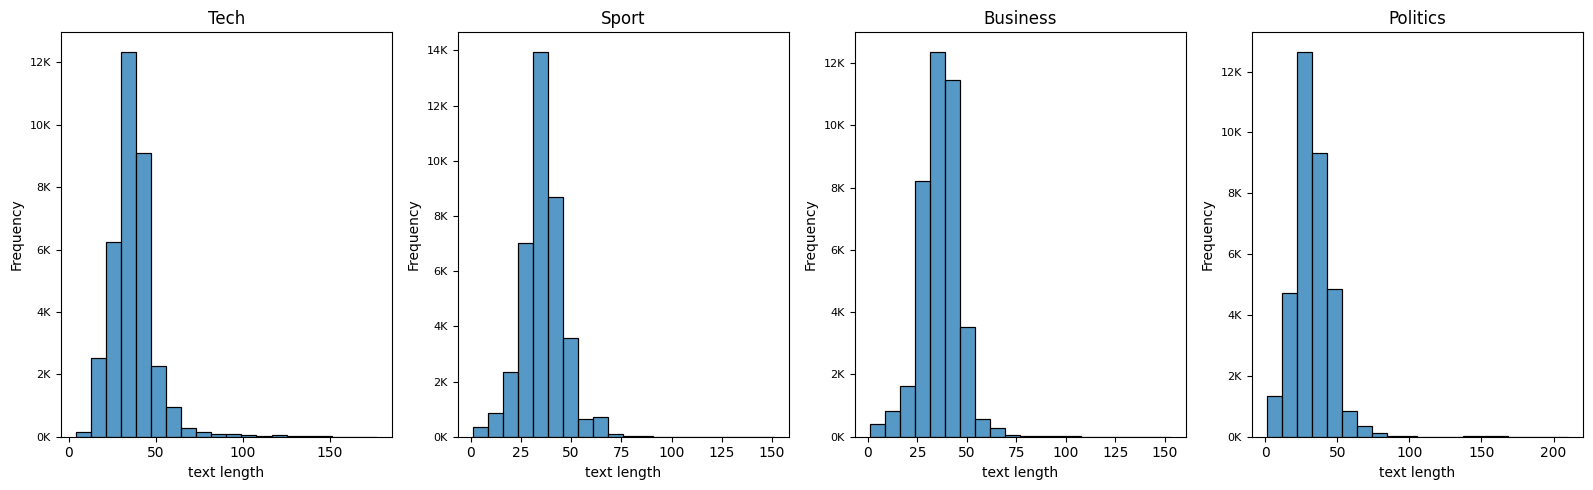

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker

# Define the number of columns for each row
num_cols_per_row = 5

# Create a list of unique categories
categories = df['category'].unique()

# Calculate the number of rows needed
num_rows = (len(categories) + num_cols_per_row - 1) // num_cols_per_row

# Define shorter figure size
short_figsize = (20, 5)  # Adjust as needed

# Create subplots for each category
fig, axes = plt.subplots(num_rows, num_cols_per_row, figsize=short_figsize)

# Flatten the axes array if there's only one row
if num_rows == 1:
    axes = axes.reshape(1, -1)

# Iterate through categories and create histograms
for i, category in enumerate(categories):
    row, col = divmod(i, num_cols_per_row)
    ax = axes[row, col]
    subset = df[df['category'] == category]
    sns.histplot(data=subset, x="text length full_description", bins=20, ax=ax)
    ax.set_title(category)
    ax.set_xlabel("text length")
    ax.set_ylabel("Frequency")
    # Shorten y-axis labels and adjust font size
    formatter = ticker.FuncFormatter(lambda x, pos: '{:.0f}K'.format(x / 1000))
    ax.yaxis.set_major_formatter(formatter)
    ax.tick_params(axis='y', labelsize=8)  # Adjust font size here

# Remove any empty subplots
for i in range(len(categories), num_rows * num_cols_per_row):
    fig.delaxes(axes.flatten()[i])

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


In [31]:
df = df.drop(["source", "title", "description", "text length", "text length title","text length full_description",], axis=1)
df.head()

,category,full_description
0,Tech,Lack of cash killed Beagle 2 If there had been...
1,Tech,Some States Split With Bush on Emissions (AP) ...
2,Tech,Mobile phone #39;deafness #39; risk p2pnet.ne...
3,Tech,China #39;s Consumer Electronics Market Grows ...
4,Tech,WebMasterWorld Conference Coverage WebMasterWo...


In [32]:
# Download the stopwords dataset (only need to run this once)
nltk.download('stopwords')

# Define a function to remove stopwords from text
stop_words = set(stopwords.words('english'))

def remove_stopwords(text):
    words = text.split()
    filtered_words = [word for word in words if word.lower() not in stop_words]
    return ' '.join(filtered_words)

# Apply stopwords removal to your DataFrame
df['full_description'] = df['full_description'].apply(remove_stopwords)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [33]:
df

,category,full_description
0,Tech,Lack cash killed Beagle 2 many people taking c...
1,Tech,States Split Bush Emissions (AP) AP - Two sets...
2,Tech,Mobile phone #39;deafness #39; risk p2pnet.net...
3,Tech,China #39;s Consumer Electronics Market Grows ...
4,Tech,WebMasterWorld Conference Coverage WebMasterWo...
...,...,...
146367,Tech,Computer Users Face New Scourge (washingtonpos...
146368,Business,Campina Arla churn dairy merger Falling milk p...
146369,Tech,System X drops back p2pnet.net News:- Last nov...
146370,Business,Philippines vows default debt payments Philipp...


In [16]:
import torch
import torch.nn as nn
from transformers import DistilBertForSequenceClassification, DistilBertTokenizer
from torch.utils.data import DataLoader, TensorDataset
from sklearn.metrics import classification_report, confusion_matrix
from tqdm import tqdm
from collections import Counter
from sklearn.preprocessing import LabelEncoder

import torch
from torch.nn.utils.rnn import pad_sequence
from tqdm import tqdm

In [35]:
from sklearn.model_selection import StratifiedShuffleSplit

# Assuming you have a DataFrame named 'df' containing your data
X = df.drop(columns=['category'])  # Features (all columns except 'category')
y = df['category']  # Target

# Initialize StratifiedShuffleSplit with the desired number of splits (e.g., 1)
n_splits = 1
stratified_split = StratifiedShuffleSplit(n_splits=n_splits, test_size=0.25, random_state=42)

# Iterate over the split indices
for train_index, test_index in stratified_split.split(X, y):
    # Split your data into train and test using the selected indices
    train_df = df.iloc[train_index]
    test_df = df.iloc[test_index]


In [36]:
train_df['category'].value_counts()

category
Business    29537
Sport       28725
Politics    25758
Tech        25758
Name: count, dtype: int64

In [37]:
test_df['category'].value_counts()

category
Business    9846
Sport       9575
Tech        8586
Politics    8586
Name: count, dtype: int64

In [90]:
# Define the DistilBERT model and tokenizer
model_name = 'distilbert-base-uncased'  # Use the smaller DistilBERT model
tokenizer = DistilBertTokenizer.from_pretrained(model_name)
# adjust the number of classes accordingly.
model = DistilBertForSequenceClassification.from_pretrained(model_name, num_labels=4)

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [91]:
# Tokenize and preprocess the text data
def tokenize_text(text):
    tokens = tokenizer.encode(text, add_special_tokens=True, padding=True, truncation=True, max_length=90)  # Reduced sequence length
    return tokens

In [92]:
train_df['TokenizedText'] = train_df['full_description'].apply(tokenize_text)
#val_df['TokenizedText'] = val_df['full_description'].apply(tokenize_text)
test_df['TokenizedText'] = test_df['full_description'].apply(tokenize_text)


<ipython-input-92-3d2dac42193d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['TokenizedText'] = train_df['full_description'].apply(tokenize_text)
<ipython-input-92-3d2dac42193d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df['TokenizedText'] = test_df['full_description'].apply(tokenize_text)


In [93]:
sample_row = test_df.sample(1)
sample_row

,category,full_description,TokenizedText
76069,1,Sudanese Darfur rebels stall aid pact refugees...,"[101, 25603, 18243, 27942, 8431, 13498, 4681, ..."


In [94]:
label_encoder = LabelEncoder()

In [95]:
# Encode the 'category' column to numerical labels
train_df['category'] = label_encoder.fit_transform(train_df['category'])
#val_df['category'] = label_encoder.transform(val_df['category'])
test_df['category'] = label_encoder.transform(test_df['category'])

<ipython-input-95-e6f793fc34a0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['category'] = label_encoder.fit_transform(train_df['category'])
<ipython-input-95-e6f793fc34a0>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df['category'] = label_encoder.transform(test_df['category'])


In [96]:
sample_row = test_df.sample(1)
sample_row

,category,full_description,TokenizedText
5172,0,"Durable Goods Fall, Aircraft Orders Slump WASH...","[101, 25634, 5350, 2991, 1010, 2948, 4449, 287..."


In [97]:
# Convert tokenized data to PyTorch tensors with padding
X_train = pad_sequence([torch.tensor(seq) for seq in train_df['TokenizedText']], batch_first=True)
y_train = torch.tensor(train_df['category'].tolist())
#X_val = pad_sequence([torch.tensor(seq) for seq in val_df['TokenizedText']], batch_first=True)
#y_val = torch.tensor(val_df['category'].tolist())
X_test = pad_sequence([torch.tensor(seq) for seq in test_df['TokenizedText']], batch_first=True)
y_test = torch.tensor(test_df['category'].tolist())

In [98]:
class_frequencies = df['category'].value_counts()
class_frequencies

category
Business    39383
Sport       38300
Tech        34344
Politics    34344
Name: count, dtype: int64

In [99]:
total_samples = sum(class_frequencies.values)
class_weights = {cls: total_samples / freq for cls, freq in class_frequencies.items()}
class_weights_sum = sum(class_weights.values())
class_weights = {cls: weight / class_weights_sum for cls, weight in class_weights.items()}
class_weights

{'Business': 0.23138937692472306,
 'Sport': 0.23793231935839082,
 'Tech': 0.26533915185844303,
 'Politics': 0.26533915185844303}

In [100]:
# class_weights_tensor = torch.tensor([class_weights[cls] for cls in sorted(class_weights.keys())])
class_weights_tensor = torch.FloatTensor([class_weights[cls] for cls in sorted(class_weights.keys())])
class_weights_tensor

tensor([0.2314, 0.2653, 0.2379, 0.2653])

In [101]:
# Define a DataLoader for batching data
train_dataset = TensorDataset(X_train, y_train)
train_dataloader = DataLoader(train_dataset, batch_size=32, shuffle=True)  # Reduced batch size
#val_dataset = TensorDataset(X_val, y_val)
#val_dataloader = DataLoader(val_dataset, batch_size=16)  # Reduced batch size
test_dataset = TensorDataset(X_test, y_test)
test_dataloader = DataLoader(test_dataset, batch_size=32)  # Reduced batch size

# Define the training loop
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)
optimizer = torch.optim.AdamW(model.parameters(), lr=1e-5)
criterion = nn.CrossEntropyLoss()

In [102]:
criterion.to(device)

CrossEntropyLoss()

In [103]:
class_weights_tensor.to(device)
# class_weights_tensor = torch.FloatTensor(class_weights_tensor).cuda()
# class_weights_tensor

tensor([0.2314, 0.2653, 0.2379, 0.2653], device='cuda:0')

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from tqdm import tqdm

In [84]:
class DiceLoss(nn.Module):
    def __init__(self):
        super(DiceLoss, self).__init__()

    def forward(self, logits, targets):
        smooth = 1e-6

        # Convert logits to probabilities using softmax
        probs = F.softmax(logits, dim=1)

        # Flatten predictions and targets
        preds = probs.view(-1, probs.size(1))
        targets = targets.view(-1, targets.size(1))

        intersection = torch.sum(preds * targets, dim=0)
        predicted_sum = torch.sum(preds, dim=0)
        target_sum = torch.sum(targets, dim=0)

        dice_score = 1 - (2. * intersection + smooth) / (predicted_sum + target_sum + smooth)

        # Average dice score across all classes
        dice_loss = torch.mean(dice_score)

        return dice_loss


In [85]:
torch.cuda.is_available()

True

In [105]:
import torch
import os

# Define a directory to save the model parameters and results
save_dir = "/content/drive/MyDrive/saved_models"
os.makedirs(save_dir, exist_ok=True)

In [106]:
def train(model, dataloader, optimizer, criterion):
    model.train()
    total_loss = 0.0
    for batch in tqdm(dataloader, desc="Training"):
        inputs, labels = batch
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(inputs, labels=labels)  # Attention mask added by default
        loss = criterion(outputs.logits, labels)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    return total_loss / len(dataloader)

# Training loop for one epoch
for epoch in range(2):  # Run for 2 epochs
    train_loss = train(model, train_dataloader, optimizer, criterion)
    print(f"Epoch {epoch+1}/{2}, Train Loss: {train_loss:.4f}")
z
torch.save(model.state_dict(), os.path.join(save_dir, "model_3.pth"))

Training:  12%|█▏        | 410/3431 [04:51<35:45,  1.41it/s]


KeyboardInterrupt: 

In [ ]:

# Evaluate the model on the test dataset
model.eval()
y_true = []
y_pred = []

with torch.no_grad():
    for batch in tqdm(test_dataloader, desc="Evaluating"):
        inputs, labels = batch
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model(inputs)
        _, predicted = torch.max(outputs.logits, 1)
        y_true.extend(labels.cpu().numpy())
        y_pred.extend(predicted.cpu().numpy())



# Inverse transform the numerical labels back to original labels
y_true_orig_labels = label_encoder.inverse_transform(y_true)
y_pred_orig_labels = label_encoder.inverse_transform(y_pred)

# Save evaluation results
evaluation_results = {
    "y_true": y_true,
    "y_pred": y_pred
}

torch.save(evaluation_results, os.path.join(save_dir, "evaluation_results_3.pth"))

# Calculate confusion matrix and classification report
cm = confusion_matrix(y_true_orig_labels, y_pred_orig_labels)
print("Confusion Matrix:")
print(cm)

report = classification_report(y_true_orig_labels, y_pred_orig_labels)
print("Classification Report:")
print(report)

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

# Calculate confusion matrix and classification report
cm = confusion_matrix(y_true_orig_labels, y_pred_orig_labels)
report = classification_report(y_true_orig_labels, y_pred_orig_labels, output_dict=True)

# Calculate overall accuracy
overall_accuracy = accuracy_score(y_true_orig_labels, y_pred_orig_labels)

# Create a heatmap for the confusion matrix
plt.figure(figsize=(21, 40))
plt.subplot(2, 1, 1)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_,
            annot_kws={"size": 14})  # Increase font size
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.xticks(rotation=90)
plt.yticks(rotation=0)

# Create a DataFrame from the classification report
report_df = pd.DataFrame(report).T

# Remove support column as it's not needed
report_df = report_df.drop('support', axis=1)

# Rotate and plot a heatmap for the classification report
plt.figure(figsize=(6, 30))  # Larger size
plt.subplot(2, 1, 2)
sns.heatmap(report_df.iloc[:-3, :], annot=True, cmap='Blues', fmt='.2f', cbar=False, linewidths=0.5, linecolor='black',
            annot_kws={"size": 14})  # Increase font size
plt.title('Classification Report')
plt.xticks(rotation=0)  # Rotate x-axis labels to the left
plt.yticks(rotation=0)  # Rotate y-axis labels to the left

# Add accuracy score as a text annotation to the classification report heatmap
plt.text(0, -3, f'Overall_Accuracy: {overall_accuracy:.2f}', fontsize=20, ha='left', va='center')

plt.tight_layout()
plt.show()

In [ ]:
df['category'].value_counts()

In [6]:
import pandas as pd

In [7]:
model_name = 'distilbert-base-uncased'  # Use the same model as during training
tokenizer = DistilBertTokenizer.from_pretrained(model_name)
model = DistilBertForSequenceClassification.from_pretrained(model_name, num_labels=4)  # Adjust num_labels if necessary


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [10]:
model.load_state_dict(torch.load("/content/drive/MyDrive/saved_models/model_2.pth", map_location=torch.device('cpu')))
model.eval()

DistilBertForSequenceClassification(
  (distilbert): DistilBertModel(
    (embeddings): Embeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (transformer): Transformer(
      (layer): ModuleList(
        (0-5): 6 x TransformerBlock(
          (attention): MultiHeadSelfAttention(
            (dropout): Dropout(p=0.1, inplace=False)
            (q_lin): Linear(in_features=768, out_features=768, bias=True)
            (k_lin): Linear(in_features=768, out_features=768, bias=True)
            (v_lin): Linear(in_features=768, out_features=768, bias=True)
            (out_lin): Linear(in_features=768, out_features=768, bias=True)
          )
          (sa_layer_norm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
          (ffn): FFN(
            (dropout): Dropout(p=0.1, inplace=False)
 

In [13]:
new_test_data = pd.read_csv("/content/test_data.csv")
new_test_data.head()

,Headline,Description
0,Digital Marketing Agency Expands Services to S...,A digital marketing agency expands its service...
1,Football Club Announces Signing of Renowned Coach,The football club's appointment of a distingui...
2,Gymnastics Champion Delivers Flawless Routine ...,A gymnastics champion delivers a flawless rout...
3,Hospitality Industry Embraces Contactless Serv...,The hospitality industry embraces contactless ...
4,Tech Company Unveils Revolutionary Product Set...,The unveiling of a revolutionary product by a ...


In [14]:
new_test_data['full_description'] = new_test_data['Headline'].str.strip() + ' ' + new_test_data['Description'].str.strip()
new_test_data.head()

,Headline,Description,full_description
0,Digital Marketing Agency Expands Services to S...,A digital marketing agency expands its service...,Digital Marketing Agency Expands Services to S...
1,Football Club Announces Signing of Renowned Coach,The football club's appointment of a distingui...,Football Club Announces Signing of Renowned Co...
2,Gymnastics Champion Delivers Flawless Routine ...,A gymnastics champion delivers a flawless rout...,Gymnastics Champion Delivers Flawless Routine ...
3,Hospitality Industry Embraces Contactless Serv...,The hospitality industry embraces contactless ...,Hospitality Industry Embraces Contactless Serv...
4,Tech Company Unveils Revolutionary Product Set...,The unveiling of a revolutionary product by a ...,Tech Company Unveils Revolutionary Product Set...


In [20]:
training_labels = ['Politics', 'Business', 'Sport', 'Tech']

In [21]:
label_encoder = LabelEncoder()
label_encoder.fit(training_labels)


LabelEncoder()

In [36]:
predicted_categories = []

# Iterate over the new test dataset and make predictions
with torch.no_grad():
    for index, row in new_test_data.iterrows():
        # Tokenize the input text with the same parameters as during training
        tokens = tokenizer.encode(row['full_description'], add_special_tokens=True, padding=True, truncation=True, max_length=90)
        # print(row['full_description'])
        inputs = torch.tensor(tokens).unsqueeze(0)  # Add batch dimension
        # Forward pass
        outputs = model(inputs)
        # Get predicted class index
        _, predicted = torch.max(outputs.logits, 1)
        # print(predicted)
        # print(predicted.item())
        # Convert predicted label index to category
        predicted_category = label_encoder.inverse_transform(predicted)
        # print(predicted_category.item())
        # Append predicted category to the list
        predicted_categories.append(predicted_category.item())


In [37]:
new_test_data["predicted"] = predicted_categories

In [35]:
new_test_data['predicted'].value_counts()

predicted
Tech        178
Sport        80
Business     76
Politics      6
Name: count, dtype: int64

In [41]:
new_test_data = new_test_data.drop(['Headline', 'Description', 'full_description'], axis=1)

In [42]:
new_test_data.to_csv('g2_submission.csv', index=False)